1. Import and Install Dependencies

In [1]:
pip install tensorflow opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2                           #computer vision for realtime imagine processing
import numpy as np                   #store the numpy array of data points
import os                            #interaction between user and operating system
from matplotlib import pyplot as plt #plotting the graph
import time                          #sleep between each frame
import mediapipe as mp               #extract keypoints saving as frames

2. Visualization of Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # pre-trained machine learning model that can detect and track multiple human body landmarks such as facial landmarks, hands, and body posture.
mp_drawing = mp.solutions.drawing_utils # user-friendly visualization of the detected landmarks.

In [4]:
#OpenCV uses BGR color as a default color space to display images
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 #Make prediction ie model takes images as non writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
mp_drawing.draw_landmarks #function to draw landmarks on frames

<function mediapipe.python.solutions.drawing_utils.draw_landmarks(image: numpy.ndarray, landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList, connections: Optional[List[Tuple[int, int]]] = None, landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2), connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2))>

In [6]:
def draw_styled_landmarks(image, results):

    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )
    
    # Draw pose line connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )

3. Display Model with keypoints using web camera

In [7]:
cap = cv2.VideoCapture(0) #accessing th web camera

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#min_detection_confidence is the minimum confidence score required for a detection
#min_tracking_confidence is the minimum confidence score required for a tracking
    while cap.isOpened(): #loop through the feed

        # Read feed from camera
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show screen to the user
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully from camera feed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release() #release the web camera
    cv2.destroyAllWindows() #close down the window

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
cap.release() #release the web camera just in case camera doesn't close
cv2.destroyAllWindows() #close down the window

In [9]:
len(results.left_hand_landmarks.landmark) # number of landmark on lefthand

AttributeError: 'NoneType' object has no attribute 'landmark'

In [10]:
len(results.right_hand_landmarks.landmark) # number of landmark on righthand

21

In [11]:
len(results.pose_landmarks.landmark) #number of landmark for pose

33

In [12]:
frame.shape #last frame captured from the video

(480, 640, 3)

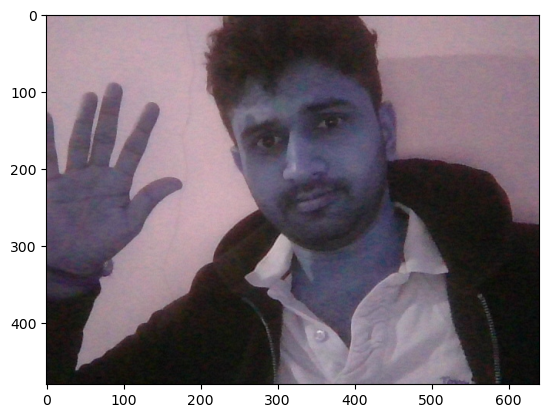

In [13]:
plt.imshow(frame) #open cv captures image in BGR

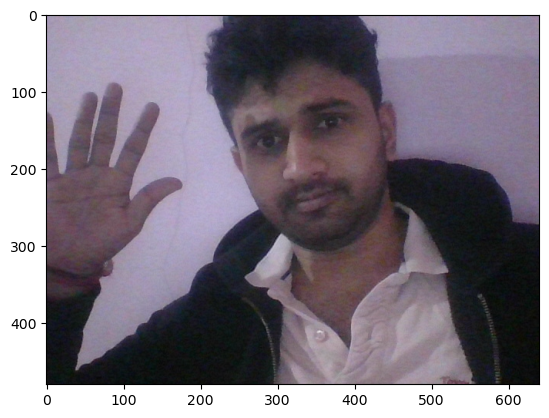

In [14]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)) #mediapipe require RGB format

4. Extract Keypoint Values from frames

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4) #flatten is used to covert to one array from list of array
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [16]:
extract_keypoints(results).shape #shape of extracted point is 258. 33*4 + 21*3 + 21*3

(258,)

5. Setting Folder for storing Numpy Array

In [17]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['done','hello','thankyou','yes'])

# fifty videos worth of data
no_sequences = 50

# Videos are going to be 50 frames in length
sequence_length = 50

In [18]:
#collect 50 frames per video and 50 vidoes per action.

for action in actions: 
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

6. Collecting Keypoint for Training and Testing Model

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences ie each videos
        for sequence in range(1,no_sequences+1):
            # Loop through video length ie sequence length
            for frame_num in range(1,sequence_length+1):

                # Read feed through web cam
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # wait logic
                if frame_num == 1: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image) # Show to screen
                    cv2.waitKey(50) #wait logic between each video
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(50)
                    
                # Export keypoints from each frames
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully from web camera
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

7. Preprocess Data and Create Labels and Features

In [19]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)} #labeling each actions

In [21]:
label_map

{'done': 0, 'hello': 1, 'thankyou': 2, 'yes': 3}

In [22]:
#sequences represent x label
#labels represent y label
sequences, labels = [], []
for action in actions:
    for sequence in range(1,no_sequences+1):
        window = []
        for frame_num in range(1,sequence_length+1):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res) #adding frame to the window
        sequences.append(window) #appending all the videos to squences label
        labels.append(label_map[action]) #labelling all the vidoes based on action

In [23]:
np.array(sequences).shape #(number of videos,frames,datapoints)

(200, 50, 258)

In [24]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [25]:
np.array(labels).shape #(number of videos,labels)

(200,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(200, 50, 258)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0,

In [30]:
y.shape

(200, 4)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=100, test_size=0.2)

In [33]:
X_train.shape

(128, 50, 258)

In [34]:
X_test.shape

(40, 50, 258)

In [35]:
y_train.shape

(128, 4)

In [36]:
y_test.shape

(40, 4)

In [37]:
X_val.shape

(32, 50, 258)

In [38]:
y_val.shape

(32, 4)

8. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(50,258)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
actions.shape[0] #output labels

4

In [43]:
opt = Adam(learning_rate=0.001)

In [44]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [46]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[tb_callback,early_stop])

Epoch 1/50
4/4 [==============================] - 5s 296ms/step - loss: 1.2167 - categorical_accuracy: 0.2891 - val_loss: 1.1524 - val_categorical_accuracy: 0.4062
Epoch 2/50
4/4 [==============================] - 0s 122ms/step - loss: 1.1553 - categorical_accuracy: 0.4141 - val_loss: 1.2648 - val_categorical_accuracy: 0.3438
Epoch 3/50
4/4 [==============================] - 0s 115ms/step - loss: 1.0682 - categorical_accuracy: 0.5391 - val_loss: 0.8317 - val_categorical_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 123ms/step - loss: 2.3385 - categorical_accuracy: 0.4844 - val_loss: 1.3613 - val_categorical_accuracy: 0.3750
Epoch 5/50
4/4 [==============================] - 0s 121ms/step - loss: 1.1762 - categorical_accuracy: 0.4922 - val_loss: 1.0620 - val_categorical_accuracy: 0.4062
Epoch 6/50
4/4 [==============================] - 0s 109ms/step - loss: 1.2393 - categorical_accuracy: 0.4922 - val_loss: 0.7563 - val_categorical_accuracy: 0.5625
Epoch 7/50
4/4 [

In [47]:
#tensorboard --logdir=. --bind_all
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            82688     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2

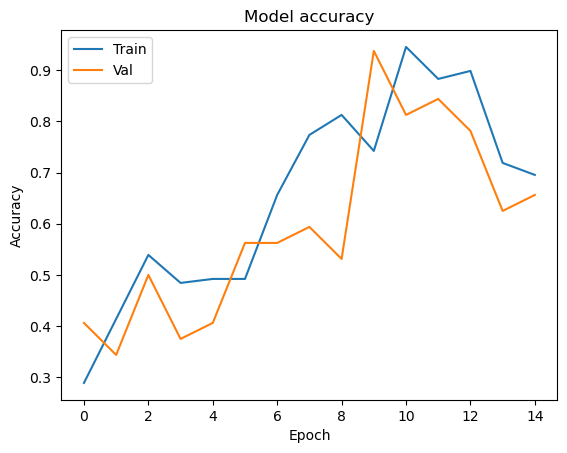

In [48]:
# plot training and validation accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

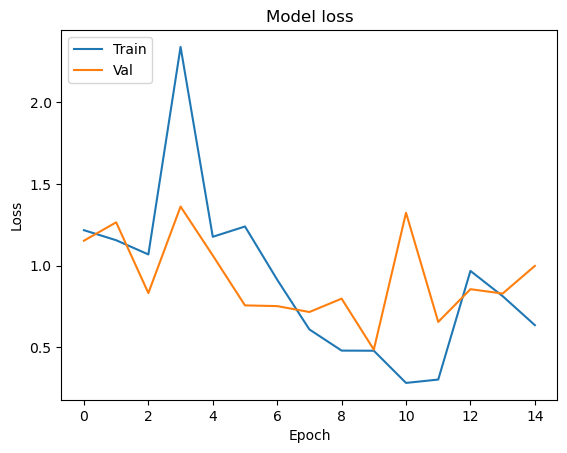

In [49]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

9. Making Prediction on Model

In [50]:
res = model.predict(X_test)

2/2 [==============================] - 0s 20ms/step


In [51]:
res #probability given by softmax

array([[2.09169358e-01, 2.41021663e-01, 2.79786229e-01, 2.70022750e-01],
       [2.34421507e-01, 2.27886632e-01, 2.92329252e-01, 2.45362639e-01],
       [1.76508009e-01, 2.09096953e-01, 1.43508598e-01, 4.70886409e-01],
       [7.92441390e-11, 1.00000000e+00, 1.89255937e-11, 4.97971486e-09],
       [2.19182253e-01, 2.35701874e-01, 2.86800206e-01, 2.58315682e-01],
       [6.27644956e-02, 1.30882397e-01, 1.55417696e-02, 7.90811360e-01],
       [1.77615404e-01, 2.63222873e-01, 2.53380269e-01, 3.05781454e-01],
       [1.75844774e-01, 2.27731302e-01, 2.00694442e-01, 3.95729482e-01],
       [1.76167697e-01, 2.15070859e-01, 1.64491788e-01, 4.44269687e-01],
       [1.70452744e-01, 1.93044201e-01, 1.22951500e-01, 5.13551474e-01],
       [1.07854158e-02, 8.59757587e-02, 2.29716231e-03, 9.00941730e-01],
       [2.03316480e-01, 2.45375916e-01, 2.73764849e-01, 2.77542770e-01],
       [1.59808584e-02, 9.85565484e-02, 4.25384101e-03, 8.81208777e-01],
       [6.82109781e-03, 6.59929290e-02, 3.07596731e

In [52]:
actions[np.argmax(res[1])]

'thankyou'

In [53]:
actions[np.argmax(y_test[1])]

'thankyou'

In [54]:
model.save('Modelppt0.h5')

In [ ]:
#del model

In [ ]:
#model.load_weights('sample.h5')

10. Evaluation using Confusion Matrix and Accuracy

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, f1_score, precision_score, recall_score, classification_report
import seaborn as sns

In [56]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 18ms/step


In [57]:
ytrue = np.argmax(y_test, axis=1).tolist()

In [58]:
yhat = np.argmax(yhat, axis=1).tolist()

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[35,  0],
        [ 0,  5]],

       [[28,  0],
        [ 8,  4]],

       [[30,  0],
        [ 3,  7]],

       [[16, 11],
        [ 0, 13]]], dtype=int64)

In [60]:
# create the confusion matrix
cm = confusion_matrix(ytrue, yhat)
print(cm)

[[ 5  0  0  0]
 [ 0  4  0  8]
 [ 0  0  7  3]
 [ 0  0  0 13]]


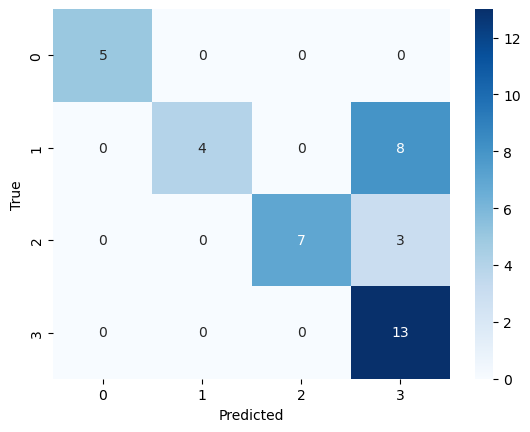

In [61]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [62]:
f1 = f1_score(ytrue, yhat, average='macro')
precision = precision_score(ytrue, yhat, average='macro')
recall = recall_score(ytrue, yhat, average='macro')

In [63]:
print('F1 score: {:.3f}'.format(f1))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))

F1 score: 0.757
Precision: 0.885
Recall: 0.758


In [80]:
print(classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.33      0.50        12
           2       1.00      0.70      0.82        10
           3       0.54      1.00      0.70        13

    accuracy                           0.73        40
   macro avg       0.89      0.76      0.76        40
weighted avg       0.85      0.72      0.71        40



In [64]:
accuracy_score(ytrue, yhat)

0.725

In [74]:
# 1. New detection variables
sequence = []
#sentence = []
#threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:50]
        
        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

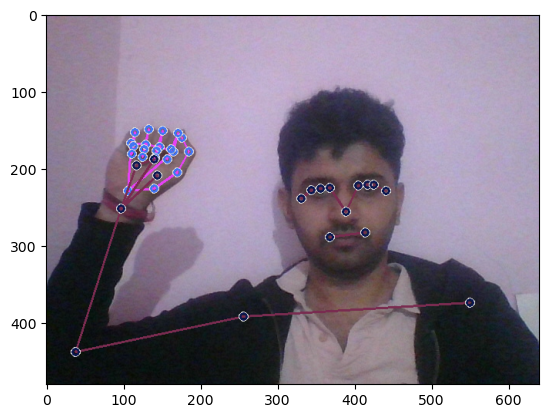

In [70]:
action2 = plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [71]:
prediction2 = actions[np.argmax(res)]

In [72]:
prediction2

'yes'